In [370]:
import pandas as pd
from glob import glob

trackDict = {'daft':['D1','D2','D4','D5','D6'],
             'fileDir':['../data/2018/EVFiles/DAFT1/exports/FishTracks*.csv',
                        '../data/2018/EVFiles/DAFT2/exports/FishTracks*.csv',
                        '../data/2019/EVFiles/DAFT1/exports/FishTracks*.csv',
                        '../data/2019/EVFiles/DAFT2/exports/FishTracks*.csv',
                        '../data/2019/EVFiles/DAFT3/exports/FishTracks*.csv'],
            'compass':[335,208,250,197,293]}

In [483]:
def buildTrackTable(trackDict):
    dfComplete = []
    for i in range(5):
        files = glob(trackDict['fileDir'][i])
        dfs = [pd.read_csv(f) for f in files]
        dfTracks = pd.concat(dfs,ignore_index=True)
        dfTracks['Date_S'] = dfTracks['Date_S'].astype(str)
        dfTracks['Datetime'] = pd.to_datetime(dfTracks['Date_S'] + ' ' + dfTracks['Time_S'])
        dfTracks = dfTracks.drop(['Date_S','Time_S'], axis=1)
        dfTracks = dfTracks.set_index('Datetime')
        dfTracks['DAFT'] = trackDict['daft'][i]
        dfTracks['corDirection_horizontal'] = dfTracks['Direction_horizontal'] + trackDict['compass'][i]-360
        dfTracks['corDirection_horizontal'][dfTracks['corDirection_horizontal'] <0] = dfTracks['corDirection_horizontal']+360
        dfTracks = dfTracks[dfTracks.TS_mean < -30]
        dfTracks['SBS_Mean'] =  10**(dfTracks.TS_mean/10)
        dfComplete.append(dfTracks)
    dfTracks = pd.concat(dfComplete,ignore_index=False)
    return dfTracks
dfTracks = buildTrackTable(trackDict)

<ipython-input-483-7fb6c0ca1dce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTracks['corDirection_horizontal'][dfTracks['corDirection_horizontal'] <0] = dfTracks['corDirection_horizontal']+360
<ipython-input-483-7fb6c0ca1dce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTracks['corDirection_horizontal'][dfTracks['corDirection_horizontal'] <0] = dfTracks['corDirection_horizontal']+360
<ipython-input-483-7fb6c0ca1dce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [485]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mp
from metpy.units import units

def getUV(dfCur):
    speed = [spd * units('m/s') for spd in dfCur.Speed_4D_mean_unsmoothed]
    direction = [(d-180) * units.deg for d in dfCur.corDirection_horizontal]
    a = [mp.wind_components(speed[i],direction[i]) for i in range(len(speed))]
    u,v = [],[]
    [u.append(i[0].magnitude) for i in a]
    [v.append(i[1].magnitude) for i in a];
    return u,v

In [486]:
import matplotlib
import matplotlib.cm as cm
minima = min(10*np.log10(dfCur.SBS_Mean))
maxima = max(10*np.log10(dfCur.SBS_Mean))
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
c = [mapper.to_rgba(v) for v in (10*np.log10(dfCur.SBS_Mean))]

[]

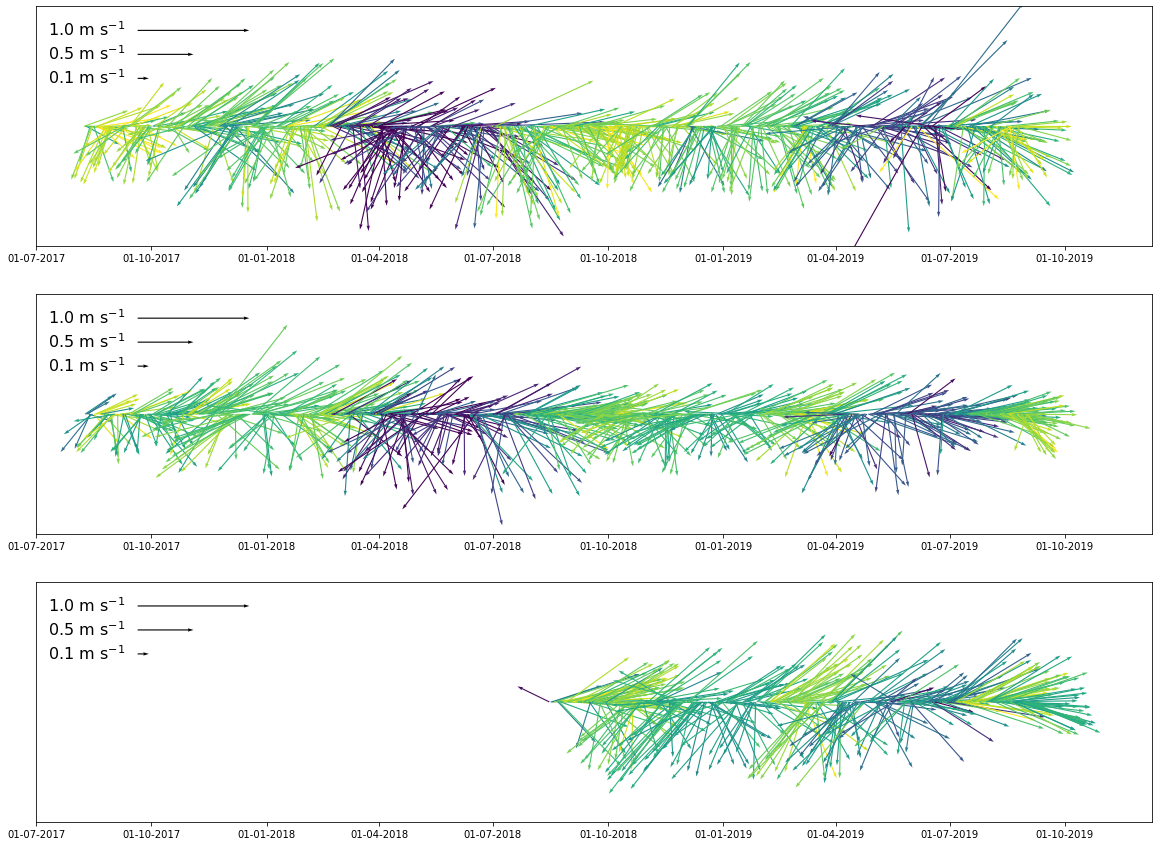

In [560]:
fig, [ax1,ax2,ax3] = plt.subplots(3, figsize =(20,15))
dfCur = dfTracks[(dfTracks.DAFT=='D1')| (dfTracks.DAFT=='D4')].resample('1D').mean()
u,v = getUV(dfCur)
idx = mpl.dates.date2num(dfCur.index)
c = [mapper.to_rgba(v) for v in (10*np.log10(dfCur.SBS_Mean))]
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d-%m-%Y'))
ax1.quiver(idx,np.zeros(len(idx)),u, v,color=c, width=.001,scale=10)
ax1.set_xlim(pd.to_datetime('7-01-2017'),pd.to_datetime('12-10-2019'))
ax1.set_ylim(-0.05,0.05)
ax1.quiver([pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017')],[.04,.03,.02],[1,0.5,.1],[0,0,0], width=.001,scale=10)
ax1.text(pd.to_datetime('7-10-2017'),0.038,'1.0 m s$^{-1}$',fontsize=16)
ax1.text(pd.to_datetime('7-10-2017'),0.028,'0.5 m s$^{-1}$',fontsize=16)
ax1.text(pd.to_datetime('7-10-2017'),0.018,'0.1 m s$^{-1}$',fontsize=16)
ax1.set_yticks([])

dfCur = dfTracks[(dfTracks.DAFT=='D2')| (dfTracks.DAFT=='D5')].resample('1D').mean()
u,v = getUV(dfCur)
idx = mpl.dates.date2num(dfCur.index)
c = [mapper.to_rgba(v) for v in (10*np.log10(dfCur.SBS_Mean))]
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d-%m-%Y'))
ax2.quiver(idx,np.zeros(len(idx)),u, v,color=c, width=.001,scale=10)
ax2.set_xlim(pd.to_datetime('7-01-2017'),pd.to_datetime('12-10-2019'))
ax2.set_ylim(-0.05,0.05)
ax2.quiver([pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017')],[.04,.03,.02],[1,0.5,.1],[0,0,0], width=.001,scale=10)
ax2.text(pd.to_datetime('7-10-2017'),0.038,'1.0 m s$^{-1}$',fontsize=16)
ax2.text(pd.to_datetime('7-10-2017'),0.028,'0.5 m s$^{-1}$',fontsize=16)
ax2.text(pd.to_datetime('7-10-2017'),0.018,'0.1 m s$^{-1}$',fontsize=16)
ax2.set_yticks([])

dfCur = dfTracks[(dfTracks.DAFT=='D6')].resample('1D').mean()
u,v = getUV(dfCur)
idx = mpl.dates.date2num(dfCur.index)
c = [mapper.to_rgba(v) for v in (10*np.log10(dfCur.SBS_Mean))]
ax3.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d-%m-%Y'))
ax3.quiver(idx,np.zeros(len(idx)),u, v,color=c, width=.001,scale=10)
ax3.set_xlim(pd.to_datetime('7-01-2017'),pd.to_datetime('12-10-2019'))
ax3.set_ylim(-0.05,0.05)
ax3.quiver([pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017'),pd.to_datetime('9-20-2017')],[.04,.03,.02],[1,0.5,.1],[0,0,0], width=.001,scale=10)
ax3.text(pd.to_datetime('7-10-2017'),0.038,'1.0 m s$^{-1}$',fontsize=16)
ax3.text(pd.to_datetime('7-10-2017'),0.028,'0.5 m s$^{-1}$',fontsize=16)
ax3.text(pd.to_datetime('7-10-2017'),0.018,'0.1 m s$^{-1}$',fontsize=16)
ax3.set_yticks([])

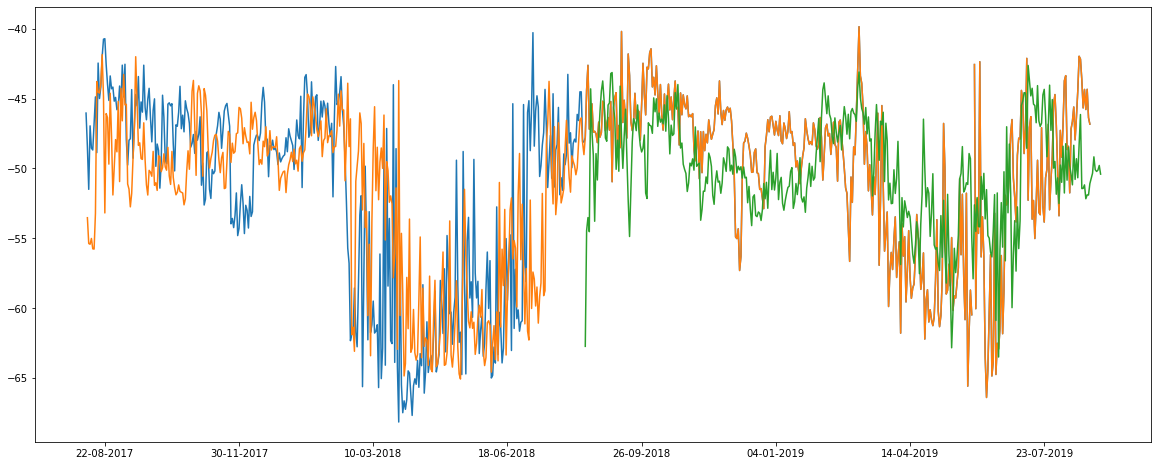

In [484]:
fig, ax = plt.subplots(1, figsize =(20,8))
dfCur = dfTracks[(dfTracks.DAFT=='D1')| (dfTracks.DAFT=='D4')].resample('1D').mean()
idx = mpl.dates.date2num(dfCur.index)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d-%m-%Y'))
ax.plot(idx,10*np.log10(dfCur.SBS_Mean))
dfCur = dfTracks[(dfTracks.DAFT=='D2')| (dfTracks.DAFT=='D4')].resample('1D').mean()
idx = mpl.dates.date2num(dfCur.index)
ax.plot(idx,10*np.log10(dfCur.SBS_Mean))
dfCur = dfTracks[(dfTracks.DAFT=='D6')].resample('1D').mean()
idx = mpl.dates.date2num(dfCur.index)
ax.plot(idx,10*np.log10(dfCur.SBS_Mean))

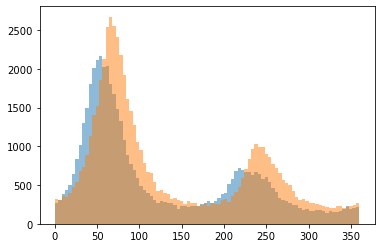

In [365]:
plt.hist(dfTracks[['Direction_horizontal','corDirection_horizontal','DAFT']][dfTracks.DAFT=='D2'].corDirection_horizontal,90,alpha=.5)
plt.hist(dfTracks[['Direction_horizontal','corDirection_horizontal','DAFT']][dfTracks.DAFT=='D5'].corDirection_horizontal,90,alpha=.5);

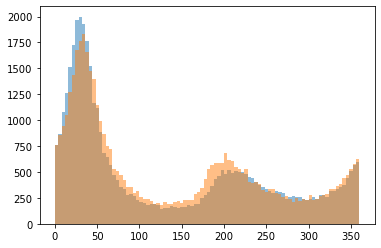

In [372]:
plt.hist(dfTracks[['Direction_horizontal','corDirection_horizontal','DAFT']][dfTracks.DAFT=='D1'].corDirection_horizontal,90,alpha=.5)
plt.hist(dfTracks[['Direction_horizontal','corDirection_horizontal','DAFT']][dfTracks.DAFT=='D4'].corDirection_horizontal,90,alpha=.5);

In [490]:
from evFileProcessing import evFuncs # ev COM functions
filesD1Y1 = glob('../data/2018/EVFiles/DAFT1/exports/Loaded*.csv')
filesD1Y2 = glob('../data/2019/EVFiles/DAFT1/exports/Loaded*.csv')
filesD2Y1 = glob('../data/2018/EVFiles/DAFT2/exports/Loaded*.csv')
filesD2Y2 = glob('../data/2019/EVFiles/DAFT2/exports/Loaded*.csv')
filesD3Y2 = glob('../data/2019/EVFiles/DAFT3/exports/Loaded*.csv')
dfD1 = evFuncs.evExports.readEvExports(filesD1Y1+filesD1Y2)
dfD2 = evFuncs.evExports.readEvExports(filesD2Y1+filesD2Y2)
dfD3 = evFuncs.evExports.readEvExports(filesD3Y2)

In [526]:
df = dfD2
df['depthBin'] = (df.layer*5)-2.5
df['weightedSA'] =df.sA*df.depthBin
curMWD =df.groupby(df.index)['weightedSA'].sum()/df.groupby(df.index)['sA'].sum()

In [491]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,11),sharex=True, sharey=True, dpi=600)
ax1=plt.subplot(311)
a = dfD3['sA'].resample('2H').sum()
a.plot( style='.',label='Wakeups',legend=False,fontsize='18',axes=ax1, color='dodgerblue')
a.resample('D').mean().plot(legend=False,label='Daily Mean', axes=ax1,linewidth=2,color='k')
ax1.axvspan(pd.to_datetime('2017-8-01'), pd.to_datetime('2018-8-14'), ymin=-60, ymax=3000, alpha=0.3, color='grey')
ax1.set_ylim([-60,3000])
ax3.set_yticks([0,1000,2000,3000])
ax1.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax1.grid()
ax1.set_xticklabels([])
ax1.xaxis.label.set_visible(False)
ax2=plt.subplot(312)
a = dfD2['sA'].resample('2H').sum()
a.plot( style='.',label='Wakeups',legend=False,fontsize='18',axes=ax2, color = 'gold')
a.resample('D').mean().plot(legend=False,label='Daily Mean', axes=ax2,linewidth=2,color='k')
ax2.set_ylim([-200,10000])
ax2.set_yticks([0,2500,5000,7500,10000])
ax2.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax2.grid()
ax2.set_xticklabels([])
ax2.xaxis.label.set_visible(False)
ax3=plt.subplot(313)
a = dfD1['sA'].resample('2H').sum()
a.plot( style='.',label='Wakeups',legend=False,fontsize='18',axes=ax3,color='tomato')
a.resample('D').mean().plot(legend=False,label='Daily Mean', axes=ax3,linewidth=2,color='k')
ax3.set_ylim([-200,10000])
ax3.set_yticks([0,2500,5000,7500,10000])
ax3.set_xlim([pd.to_datetime('2017-8-01'),pd.to_datetime('2019-9-10')])
ax3.grid()
ax3.set_xlabel('Date', fontsize=18)
ax3.legend(['2-Hour Interval','Daily Mean'],fontsize=18)

plt.subplots_adjust(hspace=.1)
f.text(0.06, 0.5, '70 kHz Backscatter (s$_{A}$, m$^{2}$ nmi$^{-2}$)', va='center', rotation='vertical',fontsize=20);